In [4]:
#Vamos a importar las bibliotecas que ocuparemos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Agregamos el url donde tenemos los datos climatologicos en nuestro caso son de la estacion 3042
# ubicada en el municipio de la Paz en baja california Sur

url = "https://raw.githubusercontent.com/Aglaeth/fisica_computacional/main/Actividad4/3042.txt"


# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'TMax', 'TMin']
df_Pocitas = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')


#Vamos a hacer una copia del archivo para poder trabajar con el 

df_Poc = df_Pocitas.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_comu = df_Poc.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'TMax', 'TMin']
for cols in cols_list:
  df_comu[cols] = pd.to_numeric(df_comu[cols], errors='coerce')

#Generamos una copia de los datos con el comando de .copy()

df_pocja = df_comu.copy()

# # Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_pocja['Fecha']=pd.to_datetime(df_pocja['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_pocja['Año'] = df_pocja['Fecha'].dt.year
df_pocja['Mes'] = df_pocja['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.

df_met = df_pocja.copy()
df_met.info()
print(df_met.head())
print(df_met.tail())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22961 entries, 0 to 22960
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   22961 non-null  datetime64[ns]
 1   Precip  22950 non-null  float64       
 2   Evap    0 non-null      float64       
 3   TMax    22900 non-null  float64       
 4   TMin    22839 non-null  float64       
 5   Año     22961 non-null  int64         
 6   Mes     22961 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 MB
       Fecha  Precip  Evap  TMax  TMin   Año  Mes
0 1952-09-01     0.0   NaN  37.0  21.0  1952    9
1 1952-09-02     0.0   NaN  36.0  22.0  1952    9
2 1952-09-03     0.0   NaN  34.0  23.0  1952    9
3 1952-09-04     0.0   NaN  33.0  24.0  1952    9
4 1952-09-05     0.0   NaN  38.0  22.0  1952    9
           Fecha  Precip  Evap  TMax  TMin   Año  Mes
22956 2017-12-26     0.0   NaN  22.0  14.0  2017   12
22957 2017-12-27   

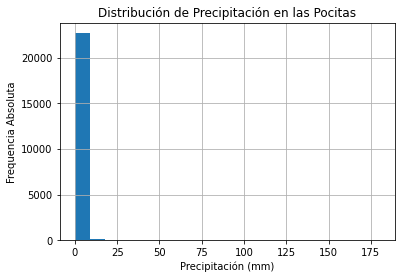

In [6]:
# Elaboración de Histogramas
# Utilizamos Matplotlib.Pyplot, abreviado como plt 
# NOTA: Usaremos la notación equivalente de columnas, df['Variable'] = df.Variable

plt.hist(df_met.Precip, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en las Pocitas')
plt.grid()
plt.show()

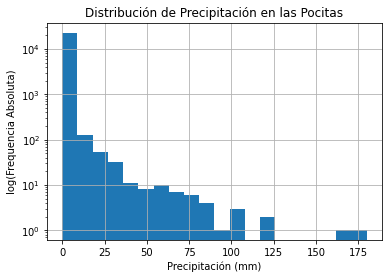

In [7]:
# Repetimos la gráfica utilizando escala logarítmica en el Eje y para mejor visualización

plt.hist(df_met.Precip, bins=20)
plt.yscale('log')
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en las Pocitas')
plt.grid()
plt.show()

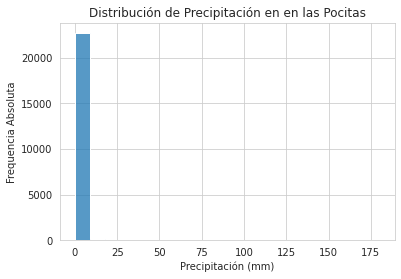

In [8]:

# Misma gráfica utilizando la biblioteca Seaborn
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en en las Pocitas')
sns.histplot(data=df_met, x='Precip', bins=20);

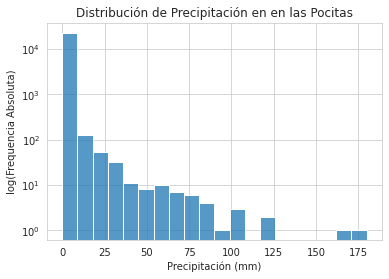

In [9]:
# Repetimos la gráfica utilizando escala logarítmica sólo en el eje y
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en en las Pocitas')
sns.histplot(data=df_met, x='Precip', bins=20, log_scale=(False,True));

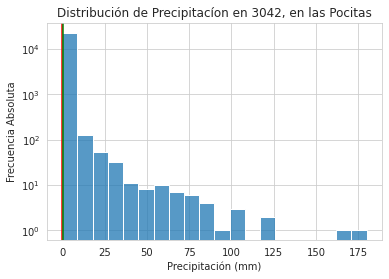

In [13]:
#Actividad 2. Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima de el conjunto de datos que se están analizando (Función: sns.histplot()). 
#Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente (Función: sns.kdeplot())


#Histograma grafica de la temperatura maxima 
sns.set_style("whitegrid")
#Nombre de los ejes y título del gráfico
#Datos y formato de la grafica
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de Precipitacíon en 3042, en las Pocitas')

sns.histplot(data=df_met, x='Precip', bins=20, log_scale=(False,True));

# Definimos las cantidades: Promedio y Mediana
Pmed  = df_met.Precip.median()
Pprom = df_met.Precip.mean()

# Lineas verticales de promedio y mediana
plt.axvline(Pmed, color = 'r');
plt.axvline(Pprom, color = 'g');

plt.show()


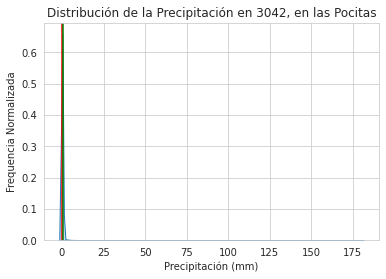

In [14]:
#Funcion de probabilidad de precipitación 

# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_met.Precip, fill=True);
plt.axvline(Pmed, color = 'r'); 
plt.axvline(Pprom, color = 'g');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en 3042, en las Pocitas')

plt.show()

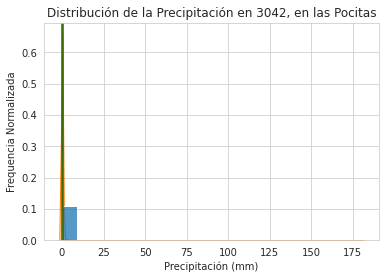

In [15]:

# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_met, x='Precip', bins=20, stat='density');
sns.kdeplot(df_met.Precip, fill=True);

plt.axvline(Pmed, color = 'r'); 
plt.axvline(Pprom, color = 'g');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en 3042, en las Pocitas')

plt.show()

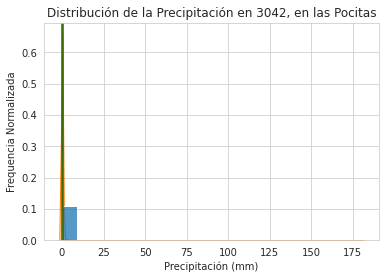

0.3795424836601307


In [16]:
# Gráfica de la Precipitación y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Pmed = df_met.Precip.median() 
Pprom = df_met.Precip.mean()

sns.histplot(data=df_met, x='Precip', bins=20, stat='density');
sns.kdeplot(df_met.Precip, fill=True);

plt.axvline(Pmed, color = 'r'); 
plt.axvline(Pprom, color = 'g');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en 3042, en las Pocitas')

plt.show()

#print(Pmed)
print(Pprom)


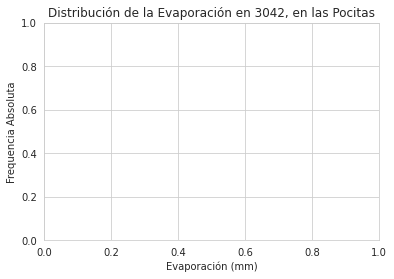

In [17]:
#Para la evaporacion 

sns.set_style("whitegrid")

#Definir cantidades específicas:Promedio y mediana
Emed= df_met.Evap.median()
Eprom= df_met.Evap.mean()

sns.histplot(data=df_met, x='Evap', bins=20);

#Líneas verticales para ubicar el promedio y mediana.
plt.axvline(x=Emed, color='r', label='m')
plt.axvline(x=Eprom, color='g', label='x')

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Evaporación en 3042, en las Pocitas')

plt.show()

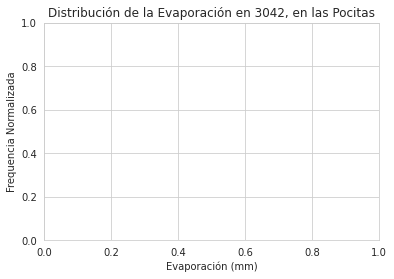

In [18]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_met.Evap, fill=True);
plt.axvline(Emed, color = 'y'); 
plt.axvline(Eprom, color = 'r');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en 3042, en las Pocitas')

plt.show()

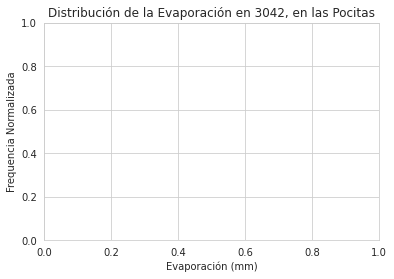

In [19]:

# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_met, x='Evap', bins=20, stat='density');
sns.kdeplot(df_met.Evap, fill=True);

plt.axvline(Emed, color = 'y'); 
plt.axvline(Eprom, color = 'r');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en 3042, en las Pocitas')

plt.show()

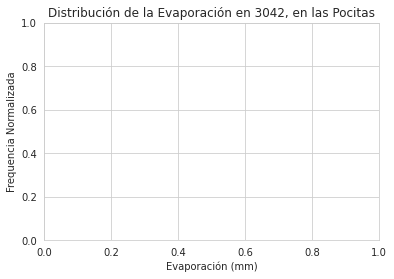

In [20]:
# Gráfica de la Evaporación y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Emed = df_met.Evap.median() 
Eprom = df_met.Evap.mean()

sns.histplot(data=df_met, x='Evap', bins=20, stat='density');
sns.kdeplot(df_met.Evap, fill=True);

plt.axvline(Emed, color = 'y'); 
plt.axvline(Eprom, color = 'r');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en 3042, en las Pocitas')

plt.show()

In [ ]:
print(Emed)
print(Eprom)


6.7
7.063441534682029


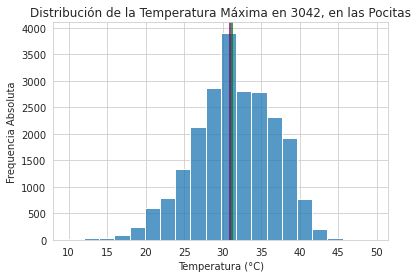

In [23]:
#Para la temperatura maxima 

#Histograma con Seaborn de la Temperatura Máxima.
sns.set_style("whitegrid")

#Definir cantidades específicas:Promedio y mediana
Tmed= df_met.TMax.median()
Tprom= df_met.TMax.mean()

sns.histplot(data=df_met, x='TMax', bins=20);

#Líneas verticales para ubicar el promedio y mediana.
plt.axvline(x= Tmed, color='purple', label='m')
plt.axvline(x= Tprom, color='g', label='x')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en 3042, en las Pocitas')

plt.show()

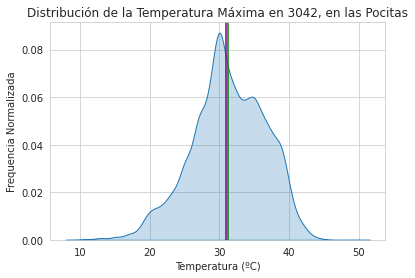

In [26]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_met.TMax, fill=True);
plt.axvline(Tmed, color = 'purple'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en 3042, en las Pocitas')

plt.show()

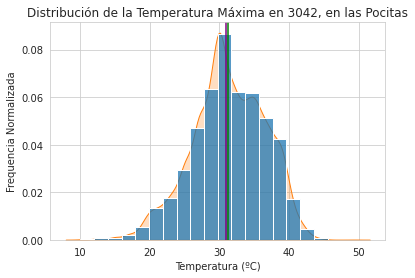

In [27]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_met, x='TMax', bins=20, stat='density');
sns.kdeplot(df_met.TMax, fill=True);

plt.axvline(Tmed, color = 'purple'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en 3042, en las Pocitas')

plt.show()

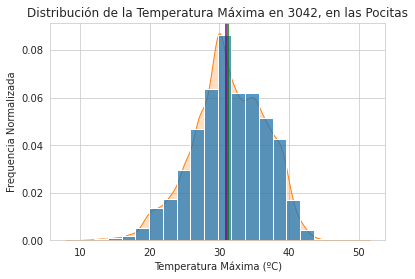

In [28]:
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_met.TMax.median() 
Tprom = df_met.TMax.mean()

sns.histplot(data=df_met, x='TMax', bins=20, stat='density');
sns.kdeplot(df_met.TMax, fill=True);

plt.axvline(Tmed, color = 'purple'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura Máxima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en 3042, en las Pocitas')

plt.show()

In [ ]:
print(Tmed)
print(Tprom)

34.0
33.293434241777476


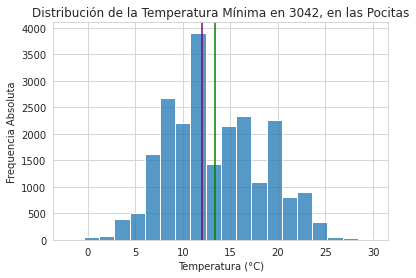

In [29]:
#Temperatura minima 

sns.set_style("whitegrid")

#Definir cantidades específicas:Promedio y mediana
Tmed= df_met.TMin.median()
Tprom= df_met.TMin.mean()

sns.histplot(data=df_met, x='TMin', bins=20);

#Líneas verticales para ubicar el promedio y mediana.
plt.axvline(x= Tmed, color='purple', label='m')
plt.axvline(x= Tprom, color='g', label='x')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en 3042, en las Pocitas')

plt.show()


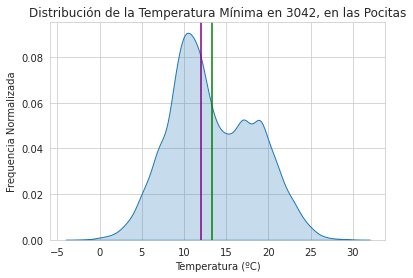

In [30]:
#Ahora hacemos la funcion de probabilidad de la temperatura minima 


# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_met.TMin, fill=True);
plt.axvline(Tmed, color = 'purple'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en 3042, en las Pocitas')

plt.show()

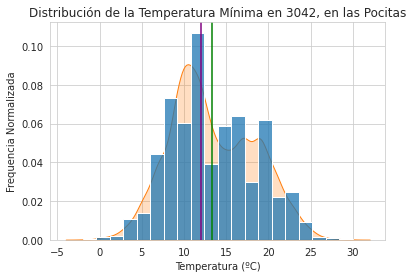

In [31]:
#sobreponemos las graficas 
sns.set_style("whitegrid")

sns.histplot(data=df_met, x='TMin', bins=20, stat='density');
sns.kdeplot(df_met.TMin, fill=True);

plt.axvline(Tmed, color = 'purple'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en 3042, en las Pocitas')

plt.show()

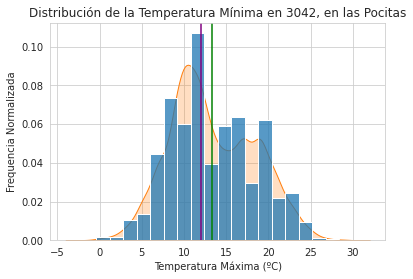

In [32]:

sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_met.TMin.median() 
Tprom = df_met.TMin.mean()

sns.histplot(data=df_met, x='TMin', bins=20, stat='density');
sns.kdeplot(df_met.TMin, fill=True);

plt.axvline(Tmed, color = 'purple'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura Máxima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en 3042, en las Pocitas')

plt.show()

In [ ]:
print(Tmed)
print(Tprom)

16.5
16.985678624632598


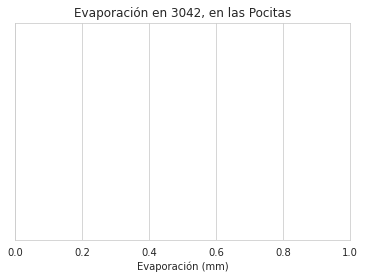

In [33]:
#Actividad 3. Crear las gráficas de cajas (Boxplot) para la Evaporación, Temperaturas Máxima y Mínima (Función: sns.boxplot())

#Empezamos con la evaporacion 

# Gráfica de caja para Evaporación utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_met.Evap, data=df_met, orient='h').set(
    xlabel='Evaporación (mm)', title= 'Evaporación en 3042, en las Pocitas');

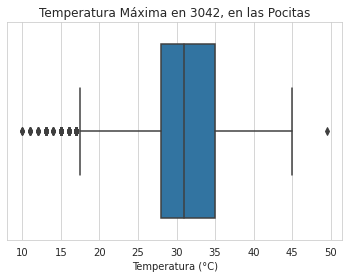

In [34]:
#Para la temperatura maxima 

# Gráfica de caja para la Temperatura Máxima utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_met.TMax, data=df_met, orient='h').set(
    xlabel='Temperatura (°C)', title= 'Temperatura Máxima en 3042, en las Pocitas');

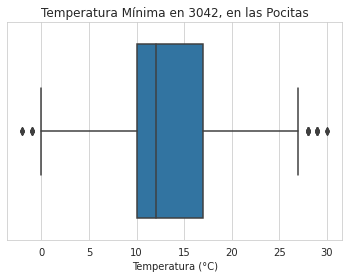

In [35]:
#Para la temperatura minima 

# Gráfica de caja para la Temperatura Mínima utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_met.TMin, data=df_met, orient='h').set(
    xlabel='Temperatura (°C)', title= 'Temperatura Mínima en 3042, en las Pocitas');

In [37]:
#Actividad 4. Produzca las gráficas de barras para la Precipitación agrupado por Años y después por meses (Función: sns.barplot())

#estudio de seleccion de 32 & 33 años 
df_32 = df_met[(df_met['Año'] >= 1952) & (df_met['Año'] < 1984)]
df_33 = df_met[(df_met['Año'] >= 1984) & (df_met['Año'] < 2017)]


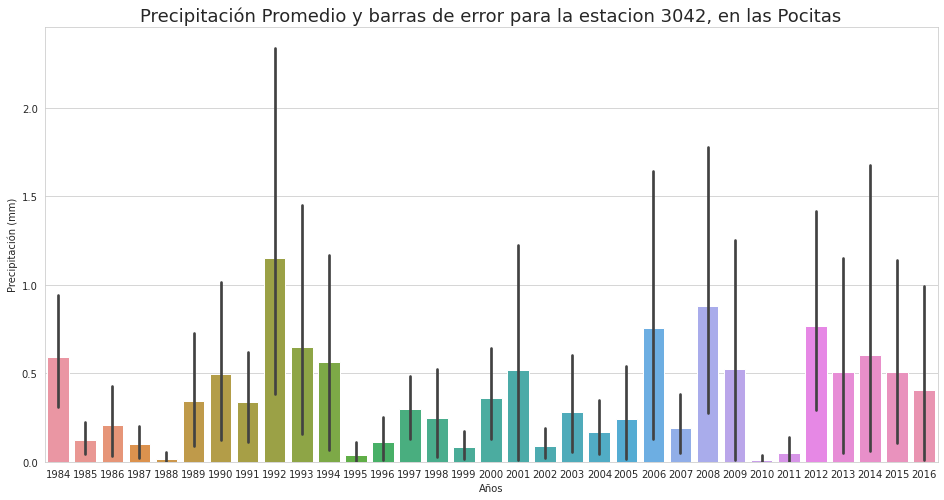

In [39]:
# Gráfica de Precipitación últimos 33 años 
# de 1984 a 2017
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_33);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para la estacion 3042, en las Pocitas', fontsize=18)

plt.show()

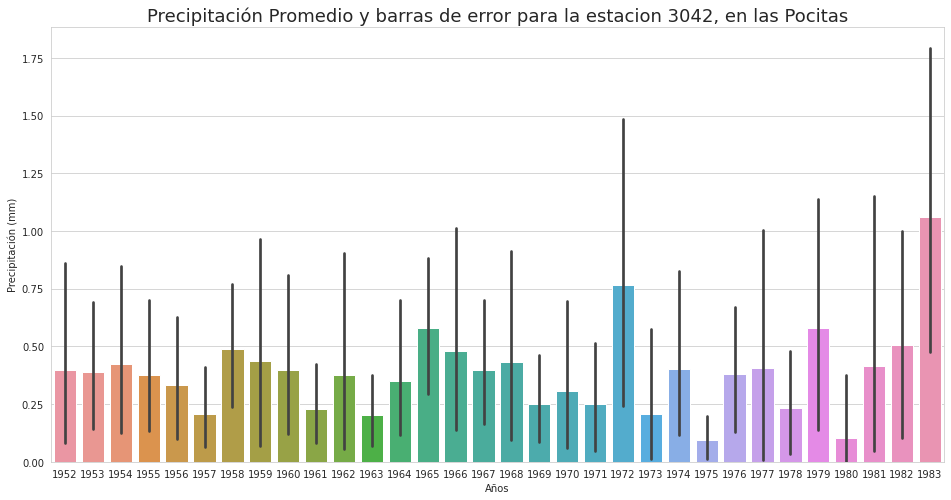

In [40]:
# Gráfica de Precipitación en un intervalo de  31 años 
# de 1952 a 1984
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_32);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para la estacion 3042, en las Pocitas', fontsize=18)

plt.show()

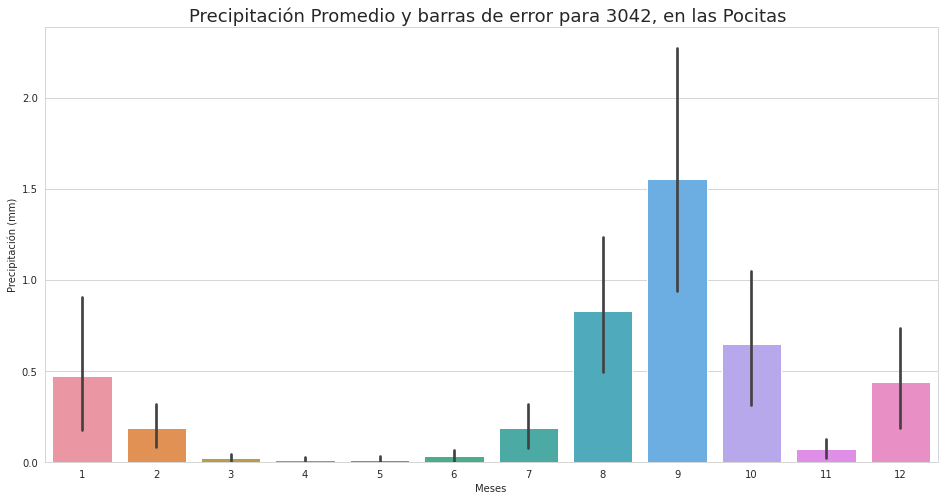

In [41]:
# Gráfica de Precipitación últimos 33 años
# Mismos que corresponden a los años de 1984 a 2017
#De los meses 
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_33);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para 3042, en las Pocitas ', fontsize=18)

plt.show()

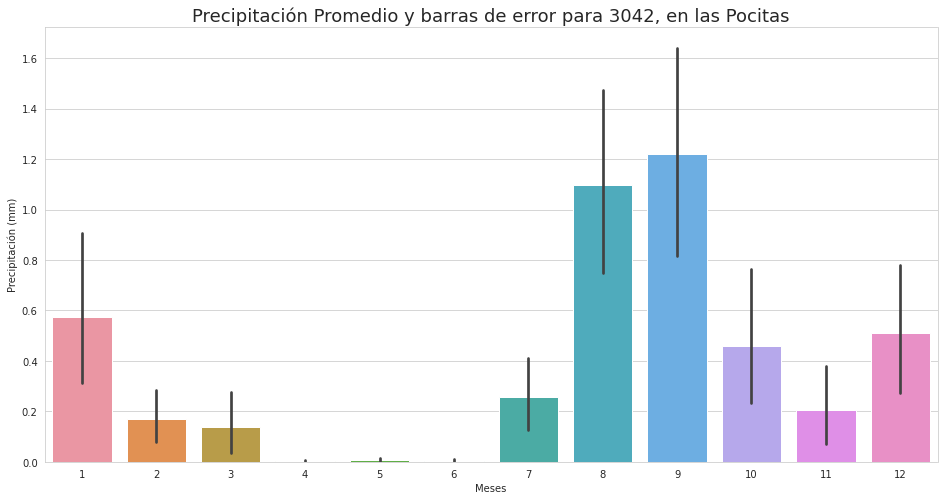

In [42]:

# Gráfica de Precipitación en un intervalo de 32 años
# Mismos que corresponden a los años de 1952 a 1984
#De los meses 
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_32);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para 3042, en las Pocitas', fontsize=18)

plt.show()

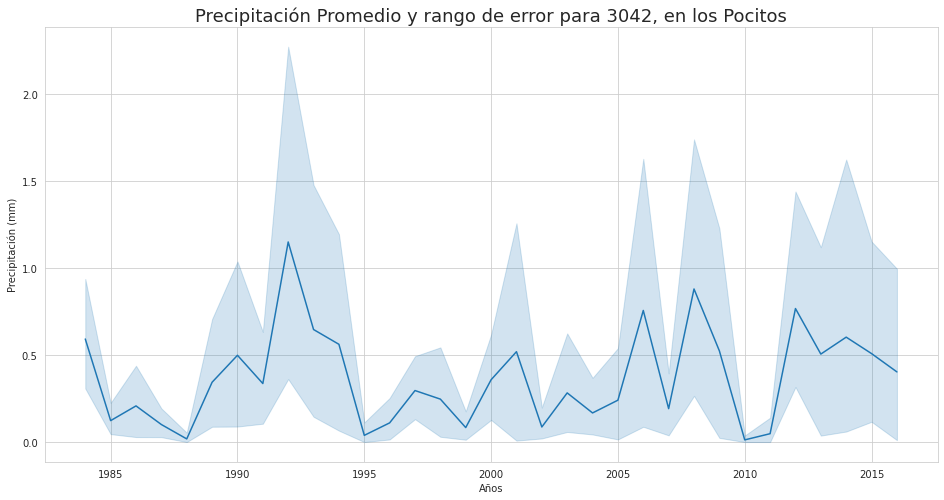

In [43]:
#Actividad 5. Por favor cree una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. 
#Crear las gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo (Últimos 30 Años). (Función: sns.lineplot())


# Gráfica de Precipitación últimos 33 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_33);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para 3042, en los Pocitos', fontsize=18)

plt.show()

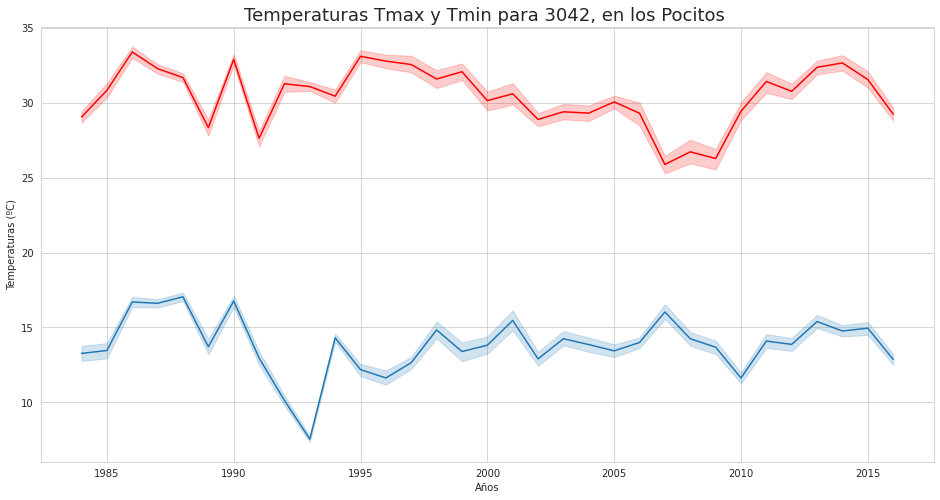

In [45]:
# Gráfica de Temperaturas de últimos 33 años
# Que corresponden a los años de 1985 a 2016


sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='TMax', data=df_33, color='r');
sns.lineplot(x='Año', y='TMin', data=df_33);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para 3042, en los Pocitos ', fontsize=18)

plt.show()


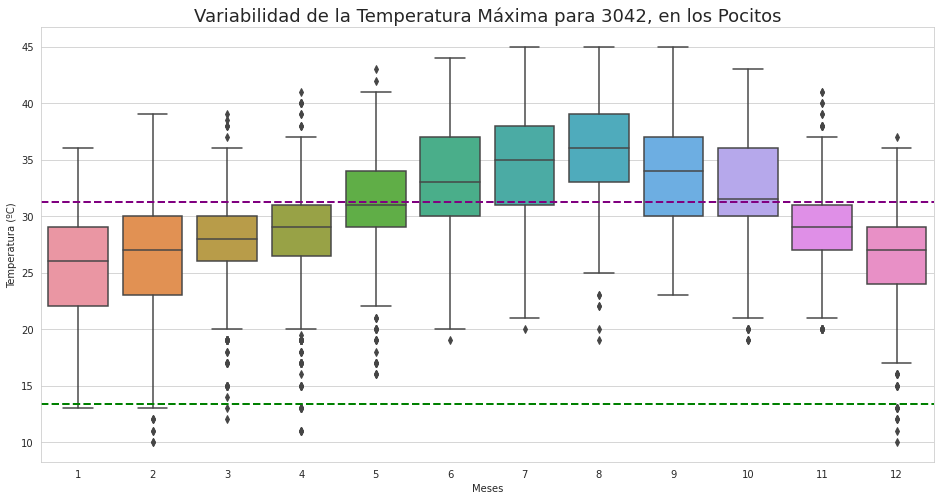

mean(Tmax) =  31.23666812227074
mean(Tmin) =  13.341223346030912
Diff Tmax_ave-Tmin_ave =  17.895444776239827


In [46]:
#Actividad 6.  Con el conjunto de 30 años de datos, produzca diagramas de cajas (Función: sns.boxplot())
#para observar la variabilidad de las Temperaturas (Max y Tmin) y la Evaporación agrupados por Mes


# Gráfica de Temepraturas Máximas en los últimos 33 años
# Que corresponden a los años de 1985
# Agrupado por Mes
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_met.TMax.mean()
Tmin_ave = df_met.TMin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='TMax', data=df_33);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'purple', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'g', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para 3042, en los Pocitos', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

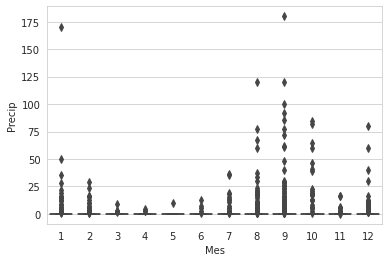

In [47]:
# La gráfica de Boxplot no brinda información de la Precipitación por mes
sns.boxplot(x='Mes' , y='Precip', data=df_33);